# Indian Stock Market(2024/10/11)
## 2023(Q3,Q4) - 2024(Q1,Q2)
## Data source - https://companiesmarketcap.com/inr/india/largest-companies-in-india-by-market-cap/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
market = pd.read_csv("/content/drive/MyDrive/Datasets/Stocks/companiesmarketcap.com - Largest Indian companies by market capitalization.csv")
pe_ratio = pd.read_csv("/content/drive/MyDrive/Datasets/Stocks/companiesmarketcap.com - Top Indian companies by P_E ratio.csv")
margin = pd.read_csv("/content/drive/MyDrive/Datasets/Stocks/companiesmarketcap.com - Top Indian companies by operating margin.csv")
earnings = pd.read_csv("/content/drive/MyDrive/Datasets/Stocks/companiesmarketcap.com - Top publicly traded Indian companies by earnings.csv")
employee = pd.read_csv("/content/drive/MyDrive/Datasets/Stocks/companiesmarketcap.com - Top publicly traded Indian companies by number of employees.csv")
revenue = pd.read_csv("/content/drive/MyDrive/Datasets/Stocks/companiesmarketcap.com - Top publicly traded Indian companies by revenue.csv")

In [ ]:
revenue

,Rank,Name,Symbol,revenue_ttm,price (INR),country
0,1,Reliance Industries,RELIANCE.NS,111086832417,2744.20,India
1,2,Life Insurance Corporation of India (LIC),LICI.NS,104146002488,948.85,India
2,3,Indian Oil,IOC.NS,92218272535,163.15,India
3,4,Oil &amp; Natural Gas,ONGC.NS,77528551410,292.55,India
4,5,Bharat Petroleum,BPCL.NS,53806964559,337.65,India
...,...,...,...,...,...,...
581,582,SPARC,SPARC.NS,8213142,213.18,India
582,583,IDFC,IDFC.NS,6087676,108.78,India
583,584,MEP Infrastructure,MEP.NS,5928520,4.26,India
584,585,N.B.I. Industrial Finance,NBIFIN.NS,1547593,2388.30,India


In [ ]:
market.shape

(586, 6)

## Data Merging

In [ ]:
final = market.merge(revenue,on = "Name")[["Name","Rank_x","Symbol_x","marketcap","price (INR)_x","country_x","revenue_ttm"]]

In [ ]:
final = final.merge(margin,on = "Name")[["Name","Rank_x","Symbol_x","marketcap","price (INR)_x","country_x","revenue_ttm","operating_margin_ttm"]]

In [ ]:
final = final.merge(earnings,on = "Name")[["Name","Rank_x","Symbol_x","marketcap","price (INR)_x","country_x","revenue_ttm","operating_margin_ttm","earnings_ttm"]]

In [ ]:
final = final.merge(employee,on = "Name")[["Name","Rank_x","Symbol_x","marketcap","price (INR)_x","country_x","revenue_ttm","operating_margin_ttm","earnings_ttm","employees_count"]]

In [ ]:
final = final.merge(pe_ratio,on="Name")[["Name","Symbol","country","price (INR)","marketcap","revenue_ttm","operating_margin_ttm","earnings_ttm","employees_count","pe_ratio_ttm"]]

## Data Cleaning

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  586 non-null    object 
 1   Symbol                586 non-null    object 
 2   country               586 non-null    object 
 3   price (INR)           586 non-null    float64
 4   marketcap             586 non-null    float64
 5   revenue_ttm           586 non-null    int64  
 6   operating_margin_ttm  586 non-null    int64  
 7   earnings_ttm          586 non-null    float64
 8   employees_count       586 non-null    int64  
 9   pe_ratio_ttm          586 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 45.9+ KB


In [ ]:
final.describe()

,price (INR),marketcap,revenue_ttm,operating_margin_ttm,earnings_ttm,employees_count,pe_ratio_ttm
count,586.000000,5.860000e+02,5.860000e+02,586.000000,5.860000e+02,586.000000,586.000000
mean,2261.307037,6.720454e+11,2.913429e+09,1105.124573,4.182689e+08,12420.720137,60.524417
std,6980.606748,1.556293e+12,9.711419e+09,5541.766647,1.238554e+09,40493.881417,318.499769
min,2.100000,9.303322e+07,-2.506490e+07,-76493.000000,-8.048320e+08,0.000000,-1040.020000
25%,268.325000,4.698510e+10,2.312523e+08,631.750000,2.108230e+07,920.500000,13.327075
50%,721.225000,1.815427e+11,5.528434e+08,1237.000000,6.752270e+07,2485.500000,34.602450
75%,1900.825000,6.189692e+11,1.645001e+09,2286.250000,2.320675e+08,7275.250000,67.218525
max,132198.000000,1.856816e+13,1.110868e+11,9877.000000,1.243700e+10,601546.000000,6782.430000


In [ ]:
final.isnull().sum()

,0
Name,0
Symbol,0
country,0
price (INR),0
marketcap,0
revenue_ttm,0
operating_margin_ttm,0
earnings_ttm,0
employees_count,0
pe_ratio_ttm,0


In [153]:
final["operating_margin_ttm"] = final["operating_margin_ttm"]/100

In [154]:
final.sort_values("operating_margin_ttm",ascending = False)

,Name,Symbol,country,price (INR),marketcap,revenue_ttm,operating_margin_ttm,earnings_ttm,employees_count,pe_ratio_ttm
58,Power Finance Corp,PFC.NS,India,467.85,154395.19,4263.80,98.77,4211.51,501,8.277960
77,Bajaj Holdings &amp; Investment,BAJAJHLDNG.NS,India,10851.10,120766.23,945.26,97.48,921.51,18,21.379200
395,Sundaram Finance,SUNDARMHLD.NS,India,346.95,7656.91,33.64,95.98,32.29,193,27.963800
185,Hudco,HUDCO.NS,India,223.10,44662.39,367.06,95.83,351.76,703,25.120800
359,JSW Holdings,JSWHL.NS,India,8974.75,9959.37,20.50,92.76,19.02,2,77.120000
...,...,...,...,...,...,...,...,...,...,...
494,Unitech Group,UNITECH.NS,India,11.18,2930.19,56.08,-305.48,-171.22,175,-1.067740
481,Mahanagar Telephone Nigam,MTNL.NS,India,50.94,3212.37,94.00,-332.62,-52.76,3749,-1.007000
407,SPARC,SPARC.NS,India,213.18,6918.16,8.21,-565.71,-46.46,403,-26.791900
583,MEP Infrastructure,MEP.NS,India,4.26,78.15,5.93,-612.55,-36.37,111,-0.378068


In [ ]:
# rupees to crores
final["marketcap"] = round(final["marketcap"]/10000000,2)
final["revenue_ttm"] = round(final["revenue_ttm"]/1000000,2)
final["earnings_ttm"] = round(final["earnings_ttm"]/1000000,2)

In [ ]:
# Operating margins in percentage
final["operating_margin_ttm"] = final["operating_margin_ttm"]/100

## Data Analysis

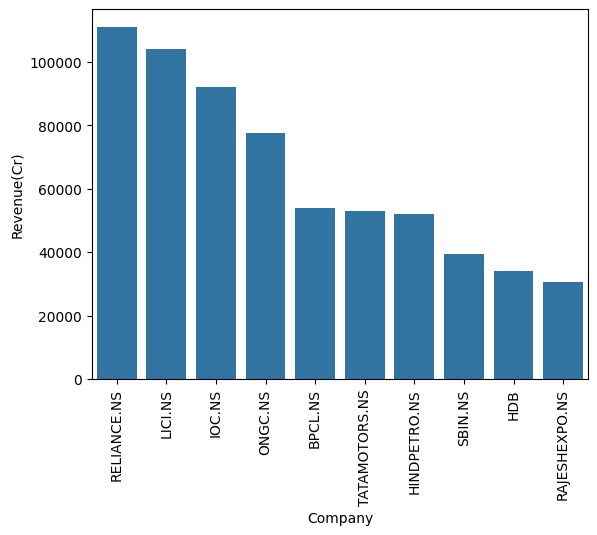

In [163]:
# Top 10 Revenue wise company in India
top10_rev = final.sort_values("revenue_ttm",ascending = False)[["Symbol","revenue_ttm"]].head(10)
sns.barplot(data = top10_rev,x = "Symbol",y = "revenue_ttm",estimator = np.sum)
plt.xticks(rotation=90)
plt.xlabel("Company")
plt.ylabel("Revenue(Cr)")
plt.title("Top 10 Revenue")
plt.show()

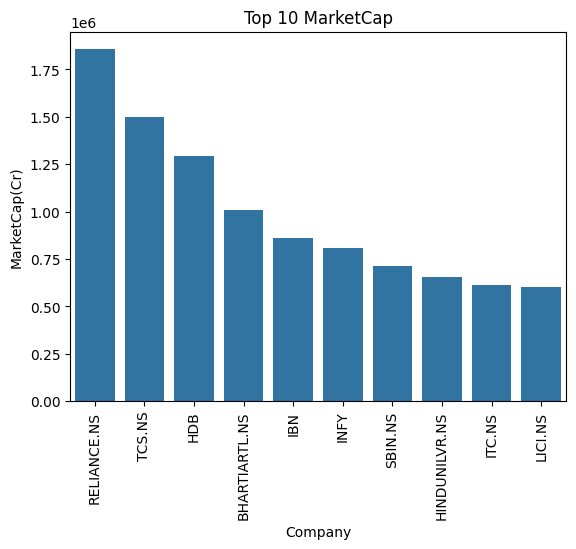

In [166]:
# Top 10 companies with market capital
top10_rev = final.sort_values("marketcap",ascending = False)[["Symbol","marketcap"]].head(10)
sns.barplot(data = top10_rev,x = "Symbol",y = "marketcap",estimator = np.sum)
plt.xticks(rotation=90)
plt.xlabel("Company")
plt.ylabel("MarketCap(Cr)")
plt.title("Top 10 MarketCap")
plt.show()


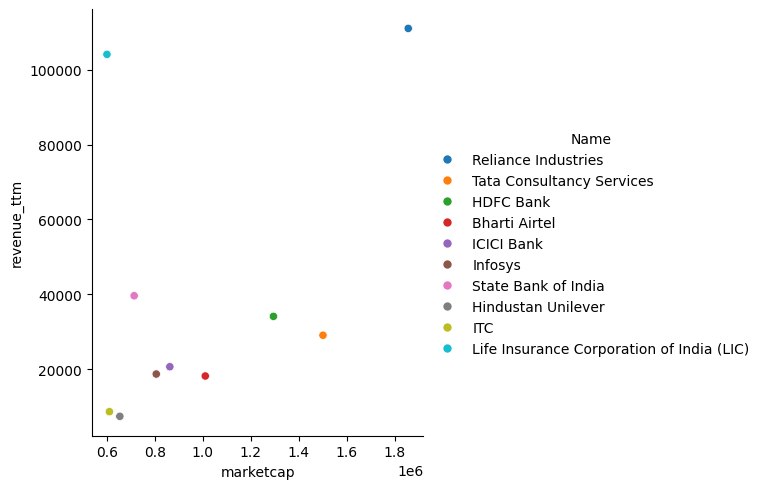

In [174]:
temp = final.head(10)
sns.relplot(kind = "scatter",data = temp,x = "marketcap",y= "revenue_ttm",hue = "Name")

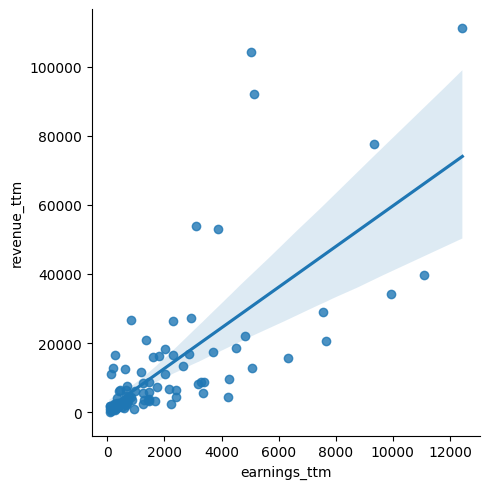

In [181]:
temp = final.head(100)
sns.lmplot(data = temp,x = "earnings_ttm",y= "revenue_ttm")

In [183]:
sns.pairplot(final,hue = "Name")

Output hidden; open in https://colab.research.google.com to view.

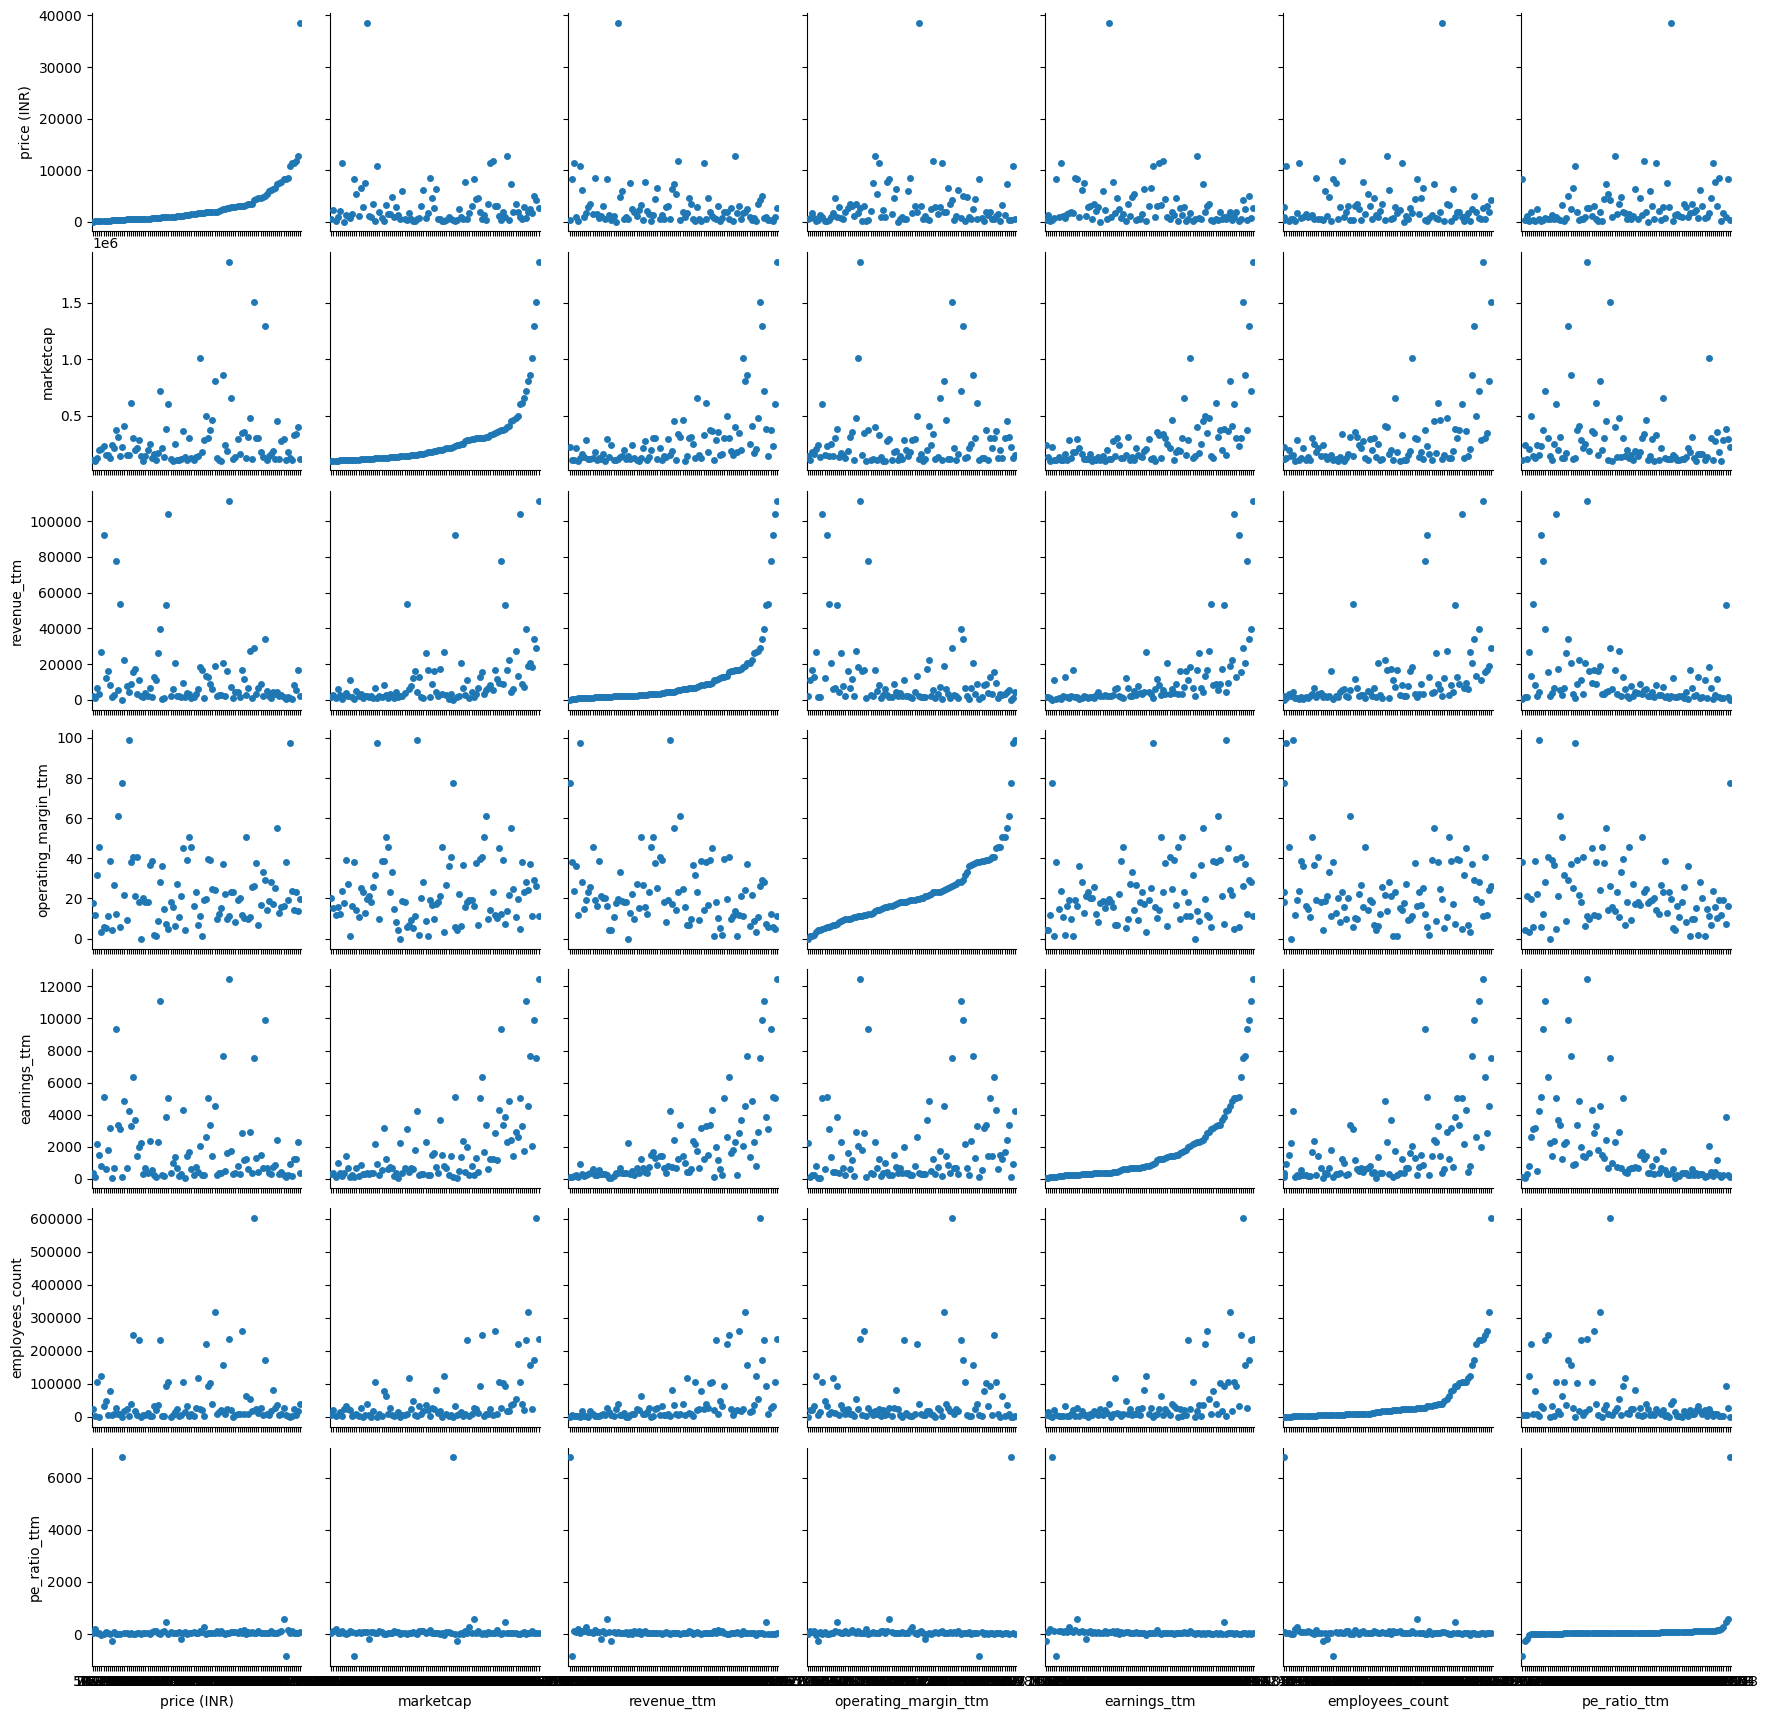

In [185]:
g =sns.PairGrid(data = temp)
g.map(sns.stripplot)

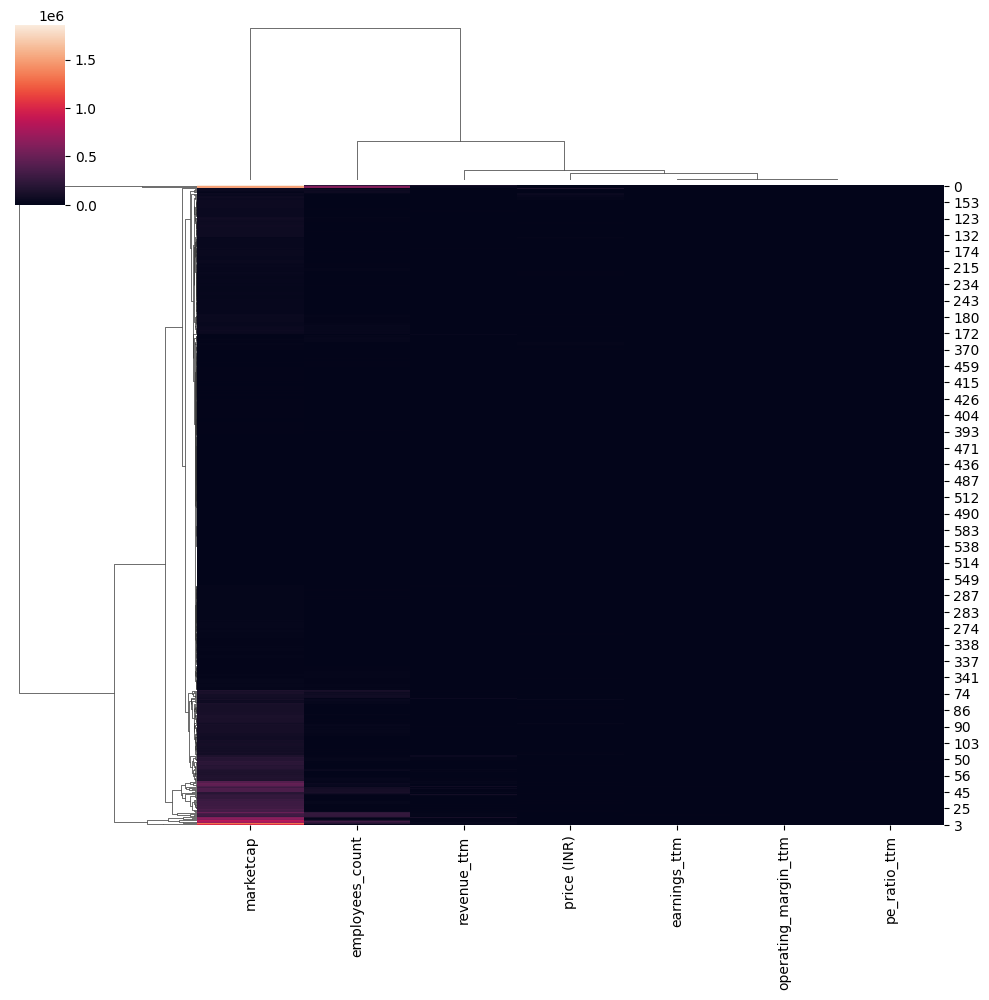

In [190]:
temp = final.drop(columns = ["Name","Symbol","country"])
sns.clustermap(temp)